In [1]:
import pandas as pd
from sklearn.datasets import load_wine

wine = load_wine()

In [2]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [14]:
wine.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                     

In [15]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [17]:
wine.frame

In [18]:
df = pd.DataFrame(wine.data)    
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [13]:
df.shape

(178, 13)

In [6]:
y = wine.target

y = y.reshape(-1,1)

In [7]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 42)

In [8]:
#importing RandomForestClassifier from ensemble module
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

C:\Users\SISIR~1.SAH\AppData\Local\Temp/ipykernel_14804/2126894482.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


In [9]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[14  0  0]
 [ 0 13  1]
 [ 0  0  8]]


<AxesSubplot:>

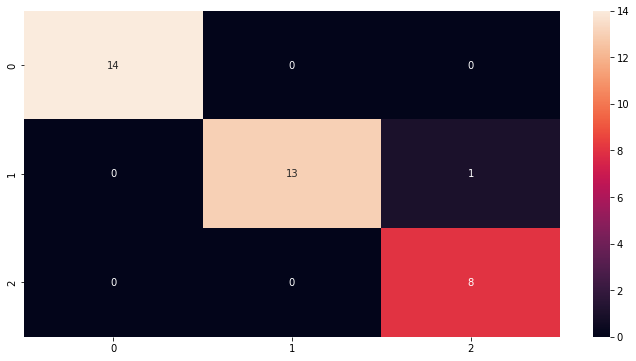

In [10]:
plt.figure(figsize = (12, 6))
import seaborn as sns
sns.heatmap(cm, annot = True)

In [11]:
#Accuracy SCore
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)

print(ac)

0.9722222222222222


In [12]:
#test for bias and variance
bias = rfc.score(x_train, y_train)
variance = rfc.score(x_test, y_test)

print(bias, variance)

1.0 0.9722222222222222
